In [4]:
from TdCARS import TdCARS
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [10]:
def test_tdCARS_simulation_FG(i):
    data = np.loadtxt(f'tdCARS_mock_data/transient_data_{i}.dat',skiprows=1, dtype=float, delimiter='\t')

    floor = 100
    nuR = np.array([800,845])
    T2 = np.array([500,500])
    A = np.array([3.5e25, 3.5e25])
    
    
    tdCARS = TdCARS.from_params(1000, 1100, 260, 260, 200, -3000, 6000, floor, nuR, T2, A)
    td_FG, signal_FG = tdCARS.CARS_simulation_FG()
    
    
    td_FG_short = td_FG[(td_FG >= np.min(data[:,0])) & (td_FG <= np.max(data[:,0]))]
    signal_FG = signal_FG[(td_FG >= np.min(data[:,0])) & (td_FG <= np.max(data[:,0]))]

    # Interpolate simulated data to match experimental time points
    simulated_signal_interp = np.interp(data[:,0], td_FG_short, np.log(signal_FG))

    # Perform linear regression between experimental and simulated signals
    slope, intercept, r_value, p_value, std_err = linregress(np.log(data[:,1]), simulated_signal_interp)

    # Assert that the correlation coefficient is above a certain threshold
    #assert r_value**2 > 0.95, f"Low correlation: R^2 = {r_value**2}"
    return np.round(r_value**2,4), (r_value**2)>0.9990

In [11]:
for i in range(8):
    print(test_tdCARS_simulation_FG(i))

(np.float64(0.9496), np.False_)
(np.float64(0.9998), np.True_)
(np.float64(0.9864), np.False_)
(np.float64(0.875), np.False_)
(np.float64(0.4367), np.False_)
(np.float64(0.3798), np.False_)
(np.float64(0.9945), np.False_)
(np.float64(0.6775), np.False_)


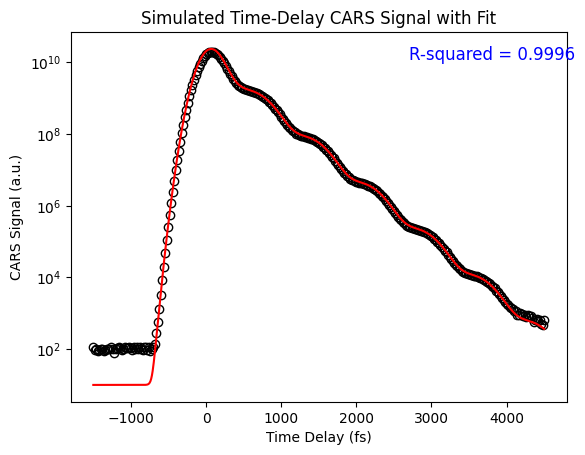

In [9]:
data = np.loadtxt('tdCARS_mock_data/transient_data_1.dat',skiprows=1, dtype=float, delimiter='\t')

tdCARS = TdCARS.from_params(1000, 1100, 260, 260, 200, -3000, 6000, 10, np.array([800,845]), np.array([500,500]), np.array([3.5e25, 3.5e25]))
td_FG, signal_FG = tdCARS.CARS_simulation_FG()
td_FG_short = td_FG[(td_FG >= np.min(data[:,0])) & (td_FG <= np.max(data[:,0]))]
signal_FG = signal_FG[(td_FG >= np.min(data[:,0])) & (td_FG <= np.max(data[:,0]))]
td_FG_low_res, signal_FG_low_res = td_FG_short[::4], signal_FG[::4] 

only_after_zero = True
x_exp, y_exp = data[:,0], np.log(data[:,1])
x_fit, y_fit = td_FG_low_res, np.log(signal_FG_low_res)
if only_after_zero:
    mask_exp = x_exp >= 0
    x_exp, y_exp = x_exp[mask_exp], y_exp[mask_exp]
    mask_fit = x_fit >= 0
    x_fit, y_fit = x_fit[mask_fit], y_fit[mask_fit]
#calculate R-squared
ss_res = np.sum((y_exp - np.interp(x_exp, x_fit, y_fit))**2)
ss_tot = np.sum((y_exp - np.mean(y_exp))**2)
r_squared = 1 - (ss_res / ss_tot)

plt.semilogy(data[:,0], data[:,1], 'ko', mfc='none')
plt.semilogy(td_FG_short, signal_FG, 'r-')
plt.text(0.6*max(td_FG_short), 0.5*max(signal_FG), f'R-squared = {r_squared:.4f}', fontsize=12, color='blue')
plt.xlabel('Time Delay (fs)')
plt.ylabel('CARS Signal (a.u.)')
plt.title('Simulated Time-Delay CARS Signal with Fit')
plt.show()

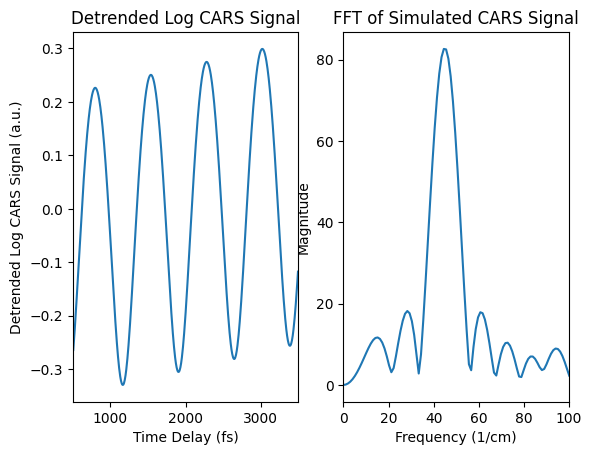

In [ ]:
#fft analysis
td1,td2 = 500,3500
x = td_FG_short[(td_FG_short > td1) & (td_FG_short < td2)]
y = np.log(signal_FG[(td_FG_short > td1) & (td_FG_short < td2)])

slope, intercept, r_value, p_value, std_err = linregress(x, y)
y = y-(slope*x+intercept)
y_padded = np.pad(y, (0, 10*len(y)), 'constant')

n = len(y_padded)
y_fft = np.fft.fft(y_padded)
y_fft_shifted = np.fft.fftshift(y_fft)
freq = np.fft.fftfreq(n, d=(x[1]-x[0]))
freq_shifted = np.fft.fftshift(freq)
magnitude = np.abs(y_fft_shifted)

plt.subplot(122)
plt.plot(freq_shifted*1e15/3e10, magnitude)
plt.xlim(0, 100)
plt.xlabel('Frequency (1/cm)')
plt.ylabel('Magnitude')
plt.title('FFT of Simulated CARS Signal')
plt.subplot(121)
plt.plot(x, y)
plt.xlim(td1, td2)
plt.xlabel('Time Delay (fs)')
plt.ylabel('Detrended Log CARS Signal (a.u.)')
plt.title('Detrended Log CARS Signal')
plt.show()

In [ ]:
%run u_test.py

..

F
FAIL: test_add_positive_numbers (__main__.TestAddFunction.test_add_positive_numbers)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/dinusha_senarathna/Desktop/Python-Physics/Optics/td_CARS_fit/u_test.py", line 8, in test_add_positive_numbers
    self.assertEqual(add(1, 2), 4)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^
AssertionError: 3 != 4

----------------------------------------------------------------------
Ran 3 tests in 0.022s

FAILED (failures=1)


SystemExit: 1